# Hepstat_Tutorial_Hypo_P 0
RooStats example: compute the p0 and significance (Hypothesis Test) 
The signal is a simple Gaussian and the background is a smoothly falling spectrum. To estimate the significance,
we need to perform an hypothesis test. We want to disprove the null model, i.e the background only model against the alternate model,
the background plus the signal. In RooStats, we do this by defining two two ModelConfig objects, one for the null model
(the background only model in this case) and one for the alternate model (the signal plus background).

 Objectives of this tutorial are the following:
 * Compute the null hypo significance using the Asymptotic calculator
 * Compute the significance by hand using the asymptotic formula
 * Compute the significance using frequentist method
 * Plot the p0 scan as a function of the signal mass


Based on the example [here](https://www.nikhef.nl/~vcroft/RooStats.html), and also [StandardFrequentistDiscovery.C](https://root.cern/doc/master/StandardFrequentistDiscovery_8C.html)


**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 07, 2021 at 09:25 AM.</small></i>

In [1]:
import os

Import the ROOT libraries

In [2]:
import ROOT as R
from math import pow, sqrt, fabs
R.gROOT.SetStyle("ATLAS")

Welcome to JupyROOT 6.22/07


Prepare the model
=======================
Signal mass point

In [3]:
mass = 125

Worksapce

In [4]:
wsfile = "test_hf_ws_{}.root".format(mass)
if not os.path.isfile(wsfile):
  print("Error! No ws files found: {}".format(wsfile)) 
  pyhist = "hepstat_tutorial_histfactory_hists.py"
  if os.path.isfile(pyhist):
    cmd = "python3 {0} {1]".format(pyhist, mass)
    os.system(cmd)

Open the workpace

In [5]:
tf = R.TFile.Open(wsfile, "READ")
w = tf.Get("myws")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



data

In [6]:
data = w.data("obsData")

The S+B model (Alternative hypo)

In [7]:
sbModel = w.obj("ModelConfig")
poi = sbModel.GetParametersOfInterest().first()
poi.setVal(1.)
sbModel.SetSnapshot(R.RooArgSet(poi))

PDF

In [8]:
pdf = sbModel.GetPdf()

save snapshot before any fit has been done

In [9]:
params = pdf.getParameters(data)
snapshotName_init = "snapshot_paramsVals_initial"
w.saveSnapshot(snapshotName_init, params)

True

The B model (Null hypo)

In [10]:
bModel = sbModel.Clone()
bModel.SetName("B_only_model")
poi.setVal(0)
bModel.SetSnapshot(R.RooArgSet(poi))

w.Print()


RooWorkspace(myws) SR workspace contents

variables
---------
(Lumi,alpha_background_shape,alpha_bkg_norm_uncertainty,alpha_signal_norm_uncertainty,binWidth_obs_x_SR_0,binWidth_obs_x_SR_1,mu,nom_alpha_background_shape,nom_alpha_bkg_norm_uncertainty,nom_alpha_signal_norm_uncertainty,nominalLumi,obs_x_SR,weightVar)

p.d.f.s
-------
RooRealSumPdf::SR_model[ binWidth_obs_x_SR_0 * L_x_signal_SR_overallSyst_x_Exp + binWidth_obs_x_SR_1 * L_x_background_SR_overallSyst_x_HistSyst ] = 1.353
RooGaussian::alpha_background_shapeConstraint[ x=alpha_background_shape mean=nom_alpha_background_shape sigma=1 ] = 1
RooGaussian::alpha_bkg_norm_uncertaintyConstraint[ x=alpha_bkg_norm_uncertainty mean=nom_alpha_bkg_norm_uncertainty sigma=1 ] = 1
RooGaussian::alpha_signal_norm_uncertaintyConstraint[ x=alpha_signal_norm_uncertainty mean=nom_alpha_signal_norm_uncertainty sigma=1 ] = 1
RooGaussian::lumiConstraint[ x=Lumi mean=nominalLumi sigma=0.02 ] = 1
RooProdPdf::model_SR[ lumiConstraint * alpha_signal_norm

Asymptotic calculator
=======================
The Asymptotic calculator it is based on the Profile Likelihood test statistics,
We will do:
 * create the AsymptoticCalculator class using the two models and the data set;
 * run the test of hypothesis using the GetHypoTest function.
 * Look at the result obtained as a HypoTestResult object

In [11]:
ac = R.RooStats.AsymptoticCalculator(data, sbModel, bModel)
ac.SetOneSidedDiscovery(True)

[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize....
[#0] PROGRESS:Eval -- AsymptoticCalculator::Initialize - Find  best unconditional NLL on observed data
AsymptoticCalculator::EvaluateNLL  ........ using Minuit / Migrad with strategy  1 and tolerance 1
 **********
 **    1 **SET PRINT           0
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_background_shape   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     2 alpha_bkg_norm_uncertainty   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     3 alpha_signal_norm_uncertainty   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     4 mu           0.00000e+00  3.00000e-01    0.00000e+00  3.00000e+00
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE4 IS AT ITS LOWER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE4 BROUG

Get the hypo test result

In [12]:
asResult = ac.GetHypoTest()
asResult.Print()
pvalue_as = asResult.NullPValue()


[#1] INFO:Eval -- AsymptoticCalculator::GetHypoTest: - perform  an hypothesis test for  POI ( mu ) = 0
[#0] PROGRESS:Eval -- AsymptoticCalculator::GetHypoTest -  Find  best conditional NLL on OBSERVED data set ..... 
AsymptoticCalculator::EvaluateNLL  ........ using Minuit / Migrad with strategy  1 and tolerance 1
 **********
 **   13 **SET PRINT           0
 **********
 **********
 **   14 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_background_shape   1.09635e-01  8.77455e-01   -5.00000e+00  5.00000e+00
     2 alpha_bkg_norm_uncertainty  -1.51887e-01  7.06075e-01   -5.00000e+00  5.00000e+00
     3 alpha_signal_norm_uncertainty   2.95562e-04  9.92555e-01   -5.00000e+00  5.00000e+00
 **********
 **   15 **SET ERR         0.5
 **********
 **********
 **   16 **SET PRINT           0
 **********
 **********
 **   17 **SET STR           1
 **********
 **********
 **   18 **MIGRAD        1500           1
 **********
 

By hand calculation
=======================

In [13]:
w.loadSnapshot(snapshotName_init)
sbModel = w.obj("ModelConfig")
pdf = sbModel.GetPdf()

Get the nuisance parameters and global observables

In [14]:
constrainedParams = sbModel.GetNuisanceParameters()
glbObs = sbModel.GetGlobalObservables()

Create the neg-log-likelihood

In [15]:
nll_sb = pdf.createNLL(data, R.RooFit.Constrain(constrainedParams), R.RooFit.GlobalObservables(glbObs), R.RooFit.Offset(1),
                                       R.RooFit.NumCPU(2), R.RooFit.Optimize(2))
nllval = nll_sb.getVal()
print("Starting NLL value:", nllval)

Starting NLL value: 31.426611090781595
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- createNLL picked up cached consraints from workspace with 3 entries
[#1] INFO:Minization --  Including the following constraint terms in minimization: (alpha_signal_norm_uncertaintyConstraint,alpha_bkg_norm_uncertaintyConstraint,alpha_background_shapeConstraint)
[#1] INFO:Minization -- The following global observables have been defined: (nom_alpha_signal_norm_uncertainty,nom_alpha_bkg_norm_uncertainty,nom_alpha_background_shape)
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 2 remote server process.
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (signal_SR_nominal,background_SR_Hist_alphanominal,background_SR_Hist_alpha_0low,background_SR_Hist_alpha_0high)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-a

Do the minimization

In [16]:
minim = R.RooMinimizer(nll_sb)
strategy = R.Math.MinimizerOptions.DefaultStrategy()
minim.setStrategy(strategy)
minim.optimizeConst(2)
minimizer = R.Math.MinimizerOptions.DefaultMinimizerType()
algorithm = R.Math.MinimizerOptions.DefaultMinimizerAlgo()
print("\n =========== Unconditinal fit =========\n")
status = minim.minimize(minimizer, algorithm)

obs_nll_min = nll_sb.getVal()
reverse = (poi.getVal() < 0)


 =========== Unconditinal fit =========

[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_SR_obsData_with_constr) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_background_shape   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     2 alpha_bkg_norm_uncertainty   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     3 alpha_signal_norm_uncertainty   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     4 mu           1.00000e+00  3.00000e-01    0.00000e+00  3.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED A

Fix POI to 0 (B-only model) and do the minimization again

In [17]:
print("\n =========== Conditinal fit =========\n")
w.loadSnapshot(snapshotName_init)
poi.setVal(0)
poi.setConstant(1)

status = minim.minimize(minimizer, algorithm)

obs_nll_min_bkg = nll_sb.getVal()


 =========== Conditinal fit =========

[#1] INFO:Minization -- RooMinimizerFcn::synchronize: set of constant parameters changed, rerunning const optimizer
 **********
 **    7 **SET PRINT           1
 **********
 **********
 **    8 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 alpha_background_shape   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     2 alpha_bkg_norm_uncertainty   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     3 alpha_signal_norm_uncertainty   0.00000e+00  1.00000e+00   -5.00000e+00  5.00000e+00
     4 mu           0.00000e+00  1.00000e-01     no limits
 **********
 **    9 **FIX           4
 **********
 **********
 **   10 **SET ERR         0.5
 **********
 **********
 **   11 **SET PRINT           1
 **********
 **********
 **   12 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   13 **MIGRAD        2000           1

The asymptotic statistic: q0 = nll(b-only, mu=0) - nll(s+b)
Significance: Z = sqrt( 2*q0 )

In [18]:
obs_q0 = 2*(obs_nll_min_bkg - obs_nll_min)

Check the sign: excess or deficit? 

In [19]:
if reverse: obs_q0 = -obs_q0
sign = 0
if obs_q0!=0: sign = obs_q0 / fabs(obs_q0)
obs_sig = sign*sqrt(fabs(obs_q0));
print("\nUnconditional NLL value:", obs_nll_min)
print("Conditional NLL value:", obs_nll_min_bkg)
print("==> Asymmptotic signficance: ", obs_sig)


Unconditional NLL value: 31.250010639010046
Conditional NLL value: 31.640569479530004
==> Asymmptotic signficance:  0.8838086224064099


The frequentist appproach
=======================

In [20]:
w.loadSnapshot(snapshotName_init)
poi.Print()
fc = R.RooStats.FrequentistCalculator(data, sbModel, bModel)

RooRealVar::mu = 1  L(0 - 3) 


Test statistics: profile liekelihood

In [21]:
profll = R.RooStats.ProfileLikelihoodTestStat(sbModel.GetPdf())
profll.SetOneSidedDiscovery(True)
profll.SetVarName("q_{0}/2")

Need to throw toys

In [22]:
toymcs = fc.GetTestStatSampler()
if not sbModel.GetPdf().canBeExtended():
    toymcs.SetNEventsPerToy(1)
    print('\nAdjusting for non-extended formalism\n')

Set the test stat

In [23]:
toymcs.SetTestStatistic(profll)

Set number of toys: null toys, alt toys

In [24]:
fc.SetToys(2500,1000)

Run the test

In [25]:
fqResult = fc.GetHypoTest()
fqResult.Print()
fqResult.GetNullDistribution().SetTitle("b only")
fqResult.GetAltDistribution().SetTitle("s+b")
fqResult.Print()
pvalue_fq = fqResult.NullPValue()


=== Using the following for B_only_model ===
Observables:             RooArgSet:: = (obs_x_SR)
Parameters of Interest:  RooArgSet:: = (mu)
Nuisance Parameters:     RooArgSet:: = (alpha_background_shape,alpha_bkg_norm_uncertainty,alpha_signal_norm_uncertainty)
Global Observables:      RooArgSet:: = (nom_alpha_signal_norm_uncertainty,nom_alpha_bkg_norm_uncertainty,nom_alpha_background_shape)
PDF:                     RooProdPdf::model_SR[ lumiConstraint * alpha_signal_norm_uncertaintyConstraint * alpha_bkg_norm_uncertaintyConstraint * alpha_background_shapeConstraint * SR_model(obs_x_SR) ] = 0.0237772/1
Snapshot:                
  1) 0x137dd2bf0 RooRealVar:: mu = 0  L(0 - 3)  "mu"


=== Using the following for ModelConfig ===
Observables:             RooArgSet:: = (obs_x_SR)
Parameters of Interest:  RooArgSet:: = (mu)
Nuisance Parameters:     RooArgSet:: = (alpha_background_shape,alpha_bkg_norm_uncertainty,alpha_signal_norm_uncertainty)
Global Observables:      RooArgSet:: = (nom_alpha_s

Plot the distributions of the test statistic

In [26]:
c = R.TCanvas()
plot = R.RooStats.HypoTestPlot(fqResult)
plot.SetLogYaxis(True)

add chi2 to plot, to check the asymptotic behavior

Info in <TCanvas::Print>: png file test_p0_1.png has been created
Info in <TCanvas::SaveAs>: ROOT file test_p0_1.root has been created


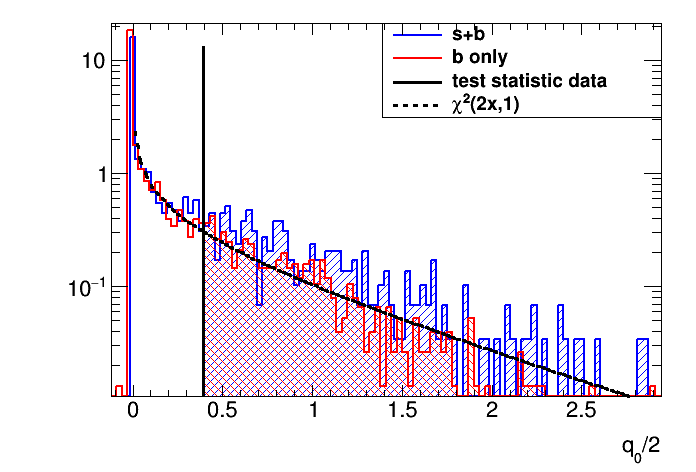

In [27]:
nPOI = 1
fchi = R.TF1("f", "1*ROOT::Math::chisquared_pdf(2*x,{0},0)".format(nPOI), 0, 20)
fchi.SetLineColor(R.kBlack)
fchi.SetLineStyle(7)
plot.AddTF1(fchi, "#chi^{{2}}(2x,{0})".format(nPOI))
plot.Draw()
c.Draw()

c.SaveAs("test_p0_1.png")
c.SaveAs("test_p0_1.root")

Draw all canvases 

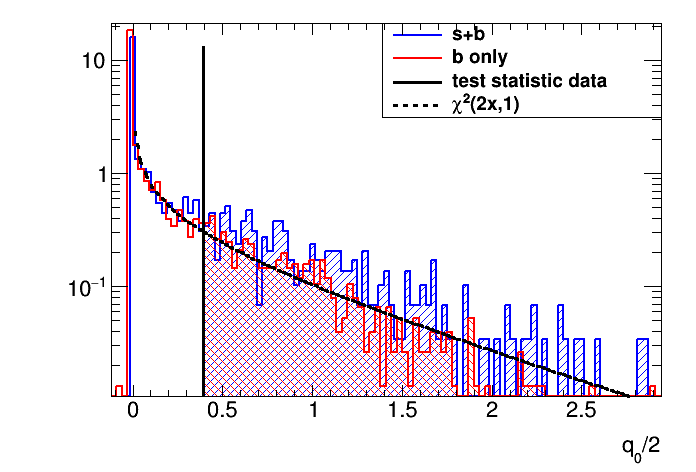

In [28]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()